elapsed time for fitting is
5930.8383593559265


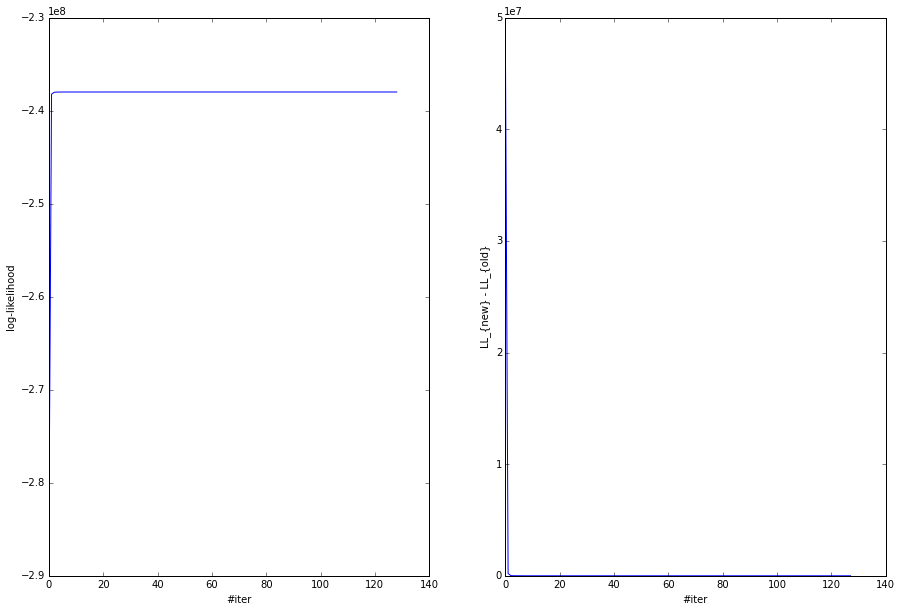

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

import ssm_timeSeries as ts  # my self-written time series overhead
import ssm_fit               # my self-written library for state-space model fitting
import ssm_scripts

import random
from datetime import datetime     # generate random seed for 
random.seed(datetime.now())       # np.random. Once this is fixed, all 
rngSeed = random.randint(0, 1000) # other 'randomness' is also fixed

%matplotlib inline


""" Set problem size """

xDim = 10     # number of clusters in the network  
yDim = 800    # 
uDim = 0      # take all the data we have
T    = 100000 #

idxy = np.random.choice(800, yDim, replace=False) # subsamples randomly without replacement
                                                   # unordered, which is important to mix the modes! 

# we fix it for reproducability:
idxy = np.array([306, 349, 788, 593, 354, 476, 144,  72,   3, 570, 448, 282, 435,
       714, 407,   6, 726, 580, 513,  54, 611, 364, 474, 781, 485, 398,
       227, 228, 441,  17, 294, 751,  46,  71, 322, 104, 387, 721, 162,
       491, 126, 616, 283,  95, 507, 718, 509, 764, 749,   7, 106, 171,
       728, 566, 477,  50, 210, 249, 556, 127, 263, 746, 747, 314, 455,
       363, 465, 724, 224, 272, 548, 183, 600, 697, 288, 754,  14, 707,
       190, 394,  97, 175, 241, 599, 301, 239, 506, 691, 303, 340, 200,
       475, 482, 134, 768, 704, 163, 716, 280, 500, 231, 120, 671, 647,
        11,  39,  99, 180,  92, 321, 113, 211, 508, 708, 379, 296, 128,
       293, 632,  27, 295, 657, 712, 197, 498, 619, 130, 594, 685,  57,
       165, 626, 358, 767, 723, 601, 630, 573, 501, 796, 778, 115, 531,
       608, 423, 607, 324, 390, 405, 625, 648, 108, 320, 560, 434, 150,
       587, 787, 750, 634, 696, 335, 504, 524, 576, 739, 182, 774, 725,
       276, 658, 125, 247, 757, 205, 561, 167, 418, 473, 612, 195, 521,
       469, 176, 660,   1, 699, 674, 411, 606, 352, 771, 155, 597, 727,
       208, 636, 142, 496, 523,  76, 517, 417, 368, 652, 456, 202, 403,
       770, 458, 794, 761, 710, 437, 484, 512, 735, 703, 729, 659, 797,
       357, 756, 453, 413, 158, 623, 532,  84,  67, 259, 172, 313, 635,
       362,  45, 664, 343, 265, 578, 269, 530, 396, 655,  77, 736, 773,
       425,  64, 503, 549, 333, 464, 514, 614,  82,  19, 260, 419, 452,
       353, 238, 369,  98, 460, 186, 542, 279,  26, 533, 145, 596,  96,
       562, 245, 575, 194,  88,  59, 192,  36,  42,  13,  28, 693, 765,
        32, 759,  75,   5, 151,  20, 217, 133, 359, 109, 480,   2, 571,
       742, 401, 649, 798, 752, 547, 673, 772,  86, 785, 431, 223, 675,
       539,  56, 376,  65,  38, 713, 684, 345, 463, 676, 372, 753, 121,
       444, 178, 277, 424, 650, 567, 670, 490, 604, 609,  34, 135, 494,
       261, 720, 384, 179, 216, 378, 605, 243, 409, 559, 454, 143, 641,
       101, 196, 745, 438,  63,   4, 422,  52, 520, 100, 737, 592, 492,
       237, 479, 318, 495, 274, 677, 481, 173, 255, 656, 392,  61, 287,
       323, 585, 487, 232, 522, 146,  90, 198, 264, 427, 112, 572, 799,
       391, 666, 170, 639, 271,  48,  18, 443, 225, 644, 382, 254,  87,
       169, 695, 538, 602, 214, 466, 184, 389,  29, 681, 414,  37, 236,
       330, 557, 525, 240, 266, 311,  30, 734, 124, 783, 732, 123, 529,
       440,  80, 640, 722, 270, 149,  40, 235, 633, 383, 309,  53, 638,
       534,  93, 325, 741,  78,  25, 563, 795, 393, 763, 715, 711, 744,
       154, 203, 355, 516, 137, 468, 789, 161, 526, 459, 603, 662, 668,
       653, 583,  47, 535, 447, 776, 278, 782, 122,  89, 478, 780, 298,
       218, 505, 618, 331,  69, 784, 111, 483, 188, 686, 291,  16, 342,
       103, 360, 242, 595, 193, 168, 527, 262, 221, 536, 528, 375, 683,
       166, 310, 709,  33,  49, 177, 692, 406, 682, 442, 373, 617, 791,
       246, 777, 667, 581, 256, 248, 457, 762, 204,  73, 467, 628, 775,
       336,  60, 519,  41, 748, 451, 275, 687, 669, 610, 153, 281, 174,
       220, 428, 139,  91, 253, 698, 159, 222, 462, 338, 131, 117, 518,
       470, 446, 365,  66, 421, 793, 700, 348, 229, 233, 486, 738, 327,
       415, 181, 215, 449, 690, 553,  62, 558, 502, 207, 706, 319, 160,
       705, 654, 510, 429, 760, 152, 226, 701, 515, 586, 312, 344, 564,
       404, 792,  22,  74, 591,  85, 251,  12, 315, 574,   9, 185, 497,
       680, 552, 141, 157, 546, 554, 543, 450, 119,  79, 156, 399, 432,
       268, 439,  35, 631, 731, 412, 212, 637, 140, 304, 386,  68,  24,
       337, 132, 702,  83, 284, 209, 598, 665, 341, 110, 201, 743, 688,
        21, 189, 590, 499,   0, 551, 488, 206, 621, 305, 645, 694, 302,
       402, 347, 577, 339, 350, 116, 569, 579,  94, 377, 385, 541,  15,
       267, 679, 374, 769,  70, 299, 129, 672, 326, 790, 436, 420, 371,
       191, 430, 689, 234, 416, 346, 328, 136, 730, 367, 629, 471, 643,
        10, 568, 381, 380, 408,   8, 351, 719, 307, 213, 663, 316, 537,
       285, 297, 511, 102, 555, 642, 624, 540, 565, 257, 733,  55, 489,
       661, 545, 230, 252, 250, 300,  58, 544, 147, 219, 589, 717, 410,
       433, 370, 786, 361, 445, 588, 244, 286, 290,  44, 615, 118, 550,
       308,  51, 292,  31, 400,  81, 317, 582, 758, 620, 395, 613, 740,
       651, 755, 461, 584, 493, 114, 329, 366, 334, 187, 273, 766, 627,
       356, 622, 199, 388, 779, 678, 258,  43, 472, 289, 426, 164, 105,
       332, 138, 107, 646, 148, 397,  23])

from scipy.io import loadmat
OUT = loadmat('/home/mackelab/Desktop/Projects/Stitching/data/clustered_networks/calcium_traces/calcTraces800.mat')
yReal = OUT['y']
yReal = yReal[np.ix_(idxy,range(T))]
Trial=1
yReal = yReal.reshape(yDim,T,1)
del OUT

""" Set observation protocol """
        
subpops = [list(range(0,yDim)), list(range(0,yDim))]
obsTime = [int(T/2), T] # start with observation of
obsPops = [0,1] # full population at t = 0

obsScheme = {'subpops': subpops,
             'obsTime': obsTime,
             'obsPops': obsPops}

fitOptions = {'ifUseB' : False,  
              'maxIter': 300, 
              'ifPlotProgress' : True,
              'covConvEps' : 1e-50,
              'ifTraceParamHist': False,
              'ifFitA' : True,
              'ifInitCwithPCA' : True,
              'ifInitAwith0_8' : True
             }

""" Fit the model, save results """

sf = '/home/mackelab/Desktop/Projects/Stitching/results/test_problems/LDS_save'
[yOut,xOut,u,learnedPars,initPars,truePars] = ssm_scripts.run(xDim, yDim, uDim, T, 
                                                              obsScheme, fitOptions,
                                                              y = yReal, x = [],
                                                              truePars=None,
                                                              initPars=None,
                                                              saveFile=sf)

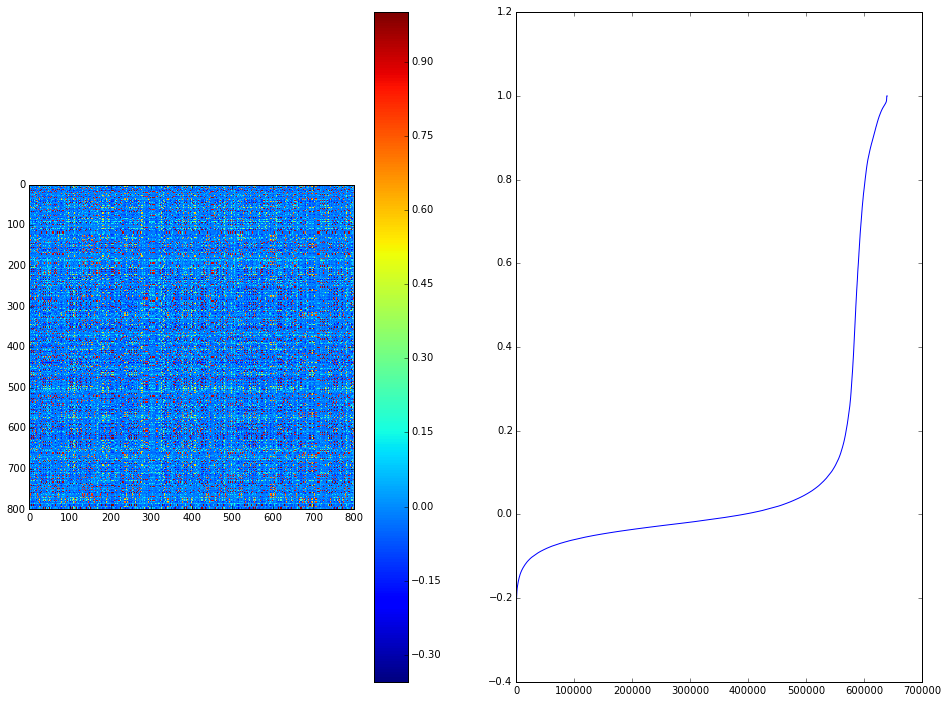

In [2]:
%matplotlib inline
corry = np.corrcoef(yOut[:,:,0])
corry.shape
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.imshow(corry, interpolation='none')
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(np.sort(corry.reshape(yDim*yDim,)))

/home/mackelab/anaconda/envs/py3k/lib/python3.3/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


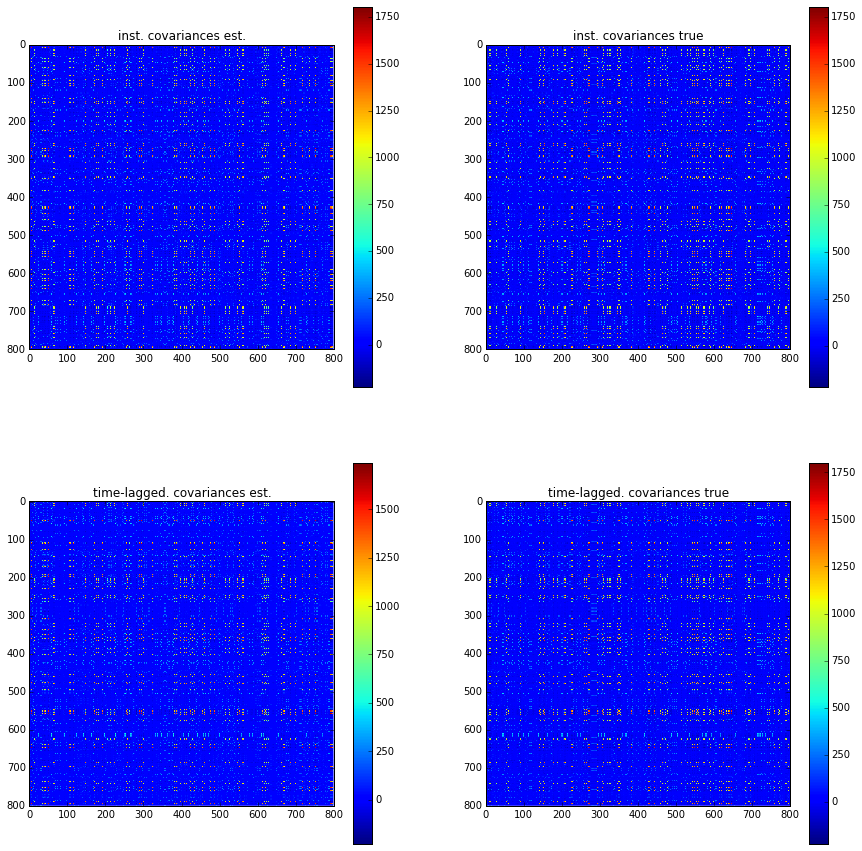

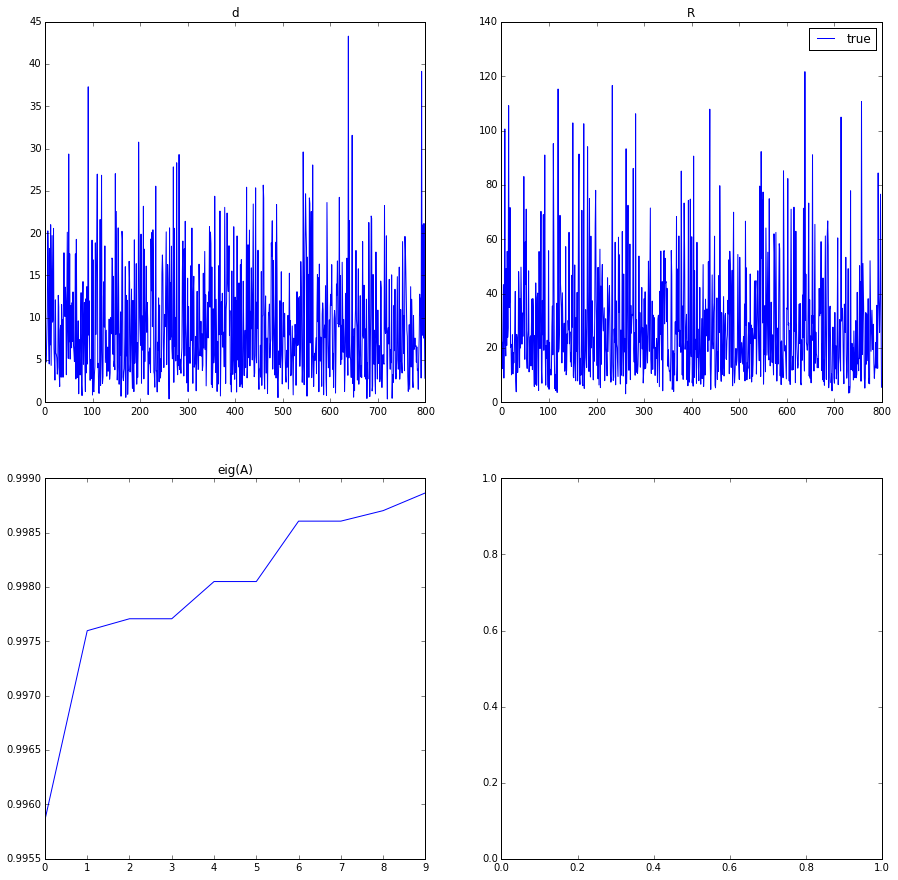

In [3]:
[A,B,Q,mu0,V0,C,d,R] = learnedPars 
Pi    = np.array([sp.linalg.solve_discrete_lyapunov(A, Q)])[0,:,:]

covy_h= np.dot(np.dot(C, Pi), C.transpose()) + np.diag(R)

y_tl = np.zeros([2*yDim,T-1])
y_tl[range(yDim),:] = yOut[:,range(0,T-1),0]
y_tl[range(yDim,2*yDim),:] = yOut[:,range(1,T),0]
covy = np.cov(y_tl)

covy_e=   covy[np.ix_(range(yDim),range(yDim))]
covy_tl_e=covy[np.ix_(range(0,yDim),range(yDim,2*yDim))]

covy_tl_h= np.dot(np.dot(C, np.dot(A,Pi)), C.transpose())

plt.figure(1,figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(np.dot(np.dot(C, Pi), C.transpose()) + np.diag(R), interpolation='none')
plt.colorbar()
plt.title('inst. covariances est.')
plt.subplot(2,2,2)
plt.imshow(covy_e, interpolation='none')
plt.title('inst. covariances true')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(np.dot(np.dot(np.dot(C, A), Pi), C.transpose()), interpolation='none' )
plt.colorbar()
plt.title('time-lagged. covariances est.')
plt.subplot(2,2,4)
plt.imshow(covy_tl_e, interpolation='none' )
plt.colorbar()
plt.title('time-lagged. covariances true')

plt.figure(2,figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(d)
plt.title('d')
plt.subplot(2,2,2)
plt.plot(R)
plt.legend(['true', 'est'])
plt.title('R')
plt.subplot(2,2,3)
plt.plot(np.sort(np.linalg.eig(A)[0]))
plt.title('eig(A)')
plt.subplot(2,2,4)


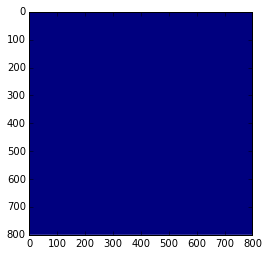

In [4]:
%matplotlib inline
idxStitched = np.ones([yDim,yDim],dtype = bool)
for i in range(len(obsScheme['subpops'])):
    if len(obsScheme['subpops'][i])>0:
        idxStitched[np.ix_(obsScheme['subpops'][i],obsScheme['subpops'][i])] = False


plt.imshow(idxStitched,interpolation='none')

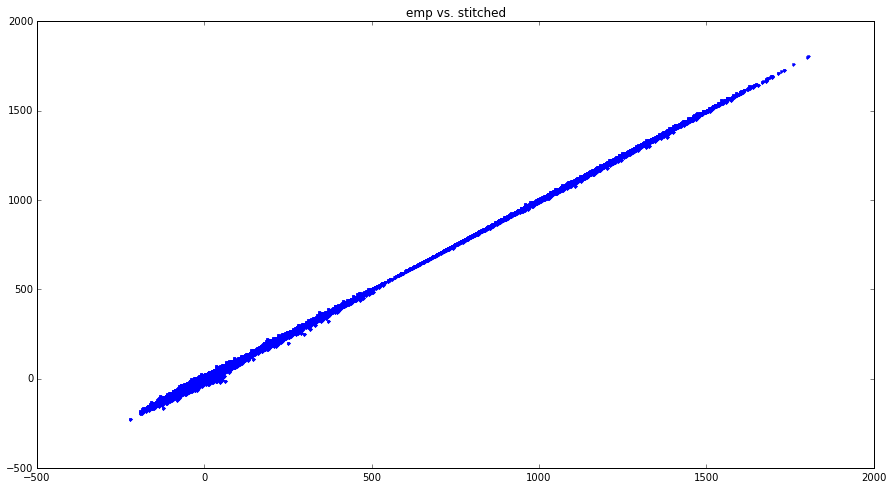

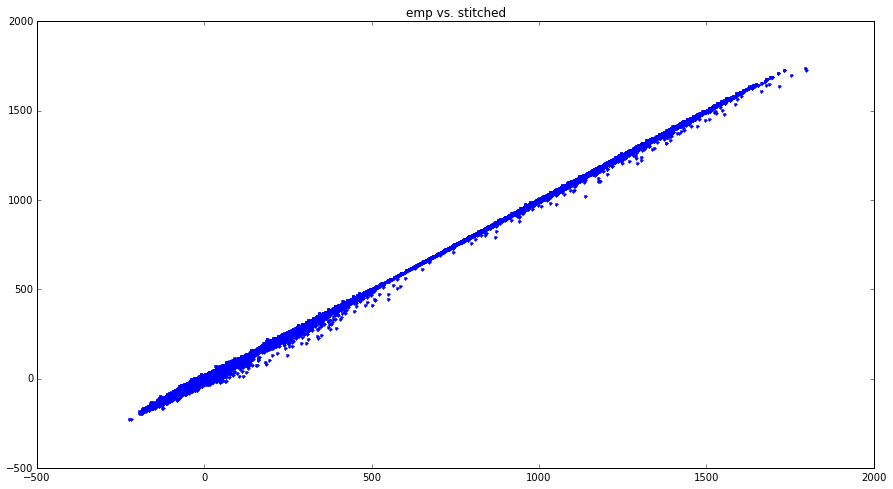

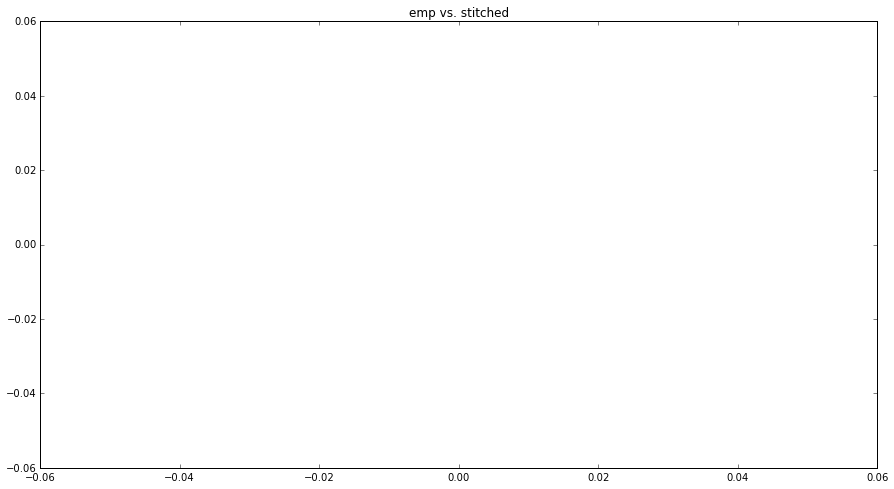

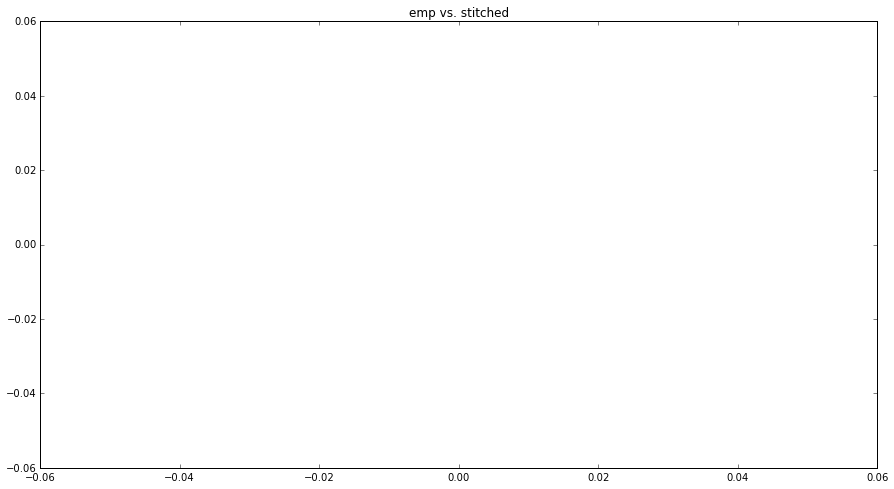

In [5]:

    
%matplotlib inline
plt.figure(1, figsize=(15,8))
plt.plot(covy_e[np.invert(idxStitched)], covy_h[np.invert(idxStitched)], '.')
plt.title('emp vs. stitched')

plt.figure(2, figsize=(15,8))
plt.plot(covy_tl_e[np.invert(idxStitched)], covy_tl_h[np.invert(idxStitched)], '.')
plt.title('emp vs. stitched')

plt.figure(3, figsize=(15,8))
plt.plot(covy_e[idxStitched], covy_h[idxStitched], '.')
plt.title('emp vs. stitched')

plt.figure(4, figsize=(15,8))
plt.plot(covy_tl_e[idxStitched], covy_tl_h[idxStitched], '.')
plt.title('emp vs. stitched')
